### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [2]:
train = pd.read_csv('dataset/train.csv') # Reading the train dataset
test = pd.read_csv('dataset/test.csv') # Reading the test dataset

### Analysing the data

In [3]:
print(f'Shape of the train dataset : {train.shape}')
# Identifying the shape of the train data which gives information related to number of records present in the dataset. 
print(f'Shape of the test dataset : {test.shape}')
# Identifying the shape of the test data which gives information related to number of records present in the dataset. 

Shape of the train dataset : (1460, 81)
Shape of the test dataset : (1459, 80)


**We can observe here that the train dataset is having one column more than teh test dataset. Because in train data we hav the target variable but in test test we need to predict the target variable values using the model trained on train data.**

**Both train and test dataset have almost equal number of records in them. In train we have 1460 records in test we have 1459 reords.**

In [4]:
train.columns # Lets check the feature and target variables present in the train dataset

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

**We can see that we have different features related to the location of the building, size of the building, connectivity, facilities etc., By looking at the features we can say that these feature are important to predict the price of the building. But we may not require some of the features which may have less impact on predicting hte price of the building**

**SalePrice is the target variable/independent variable which we need to predict for the test dataset**

In [5]:
train.head() # Prints the 5 records from the dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**From the above sample of data we can clearly say that we have 'Nan' values in the dataset. Before training the model we need to remove these 'Nan' and replace with other values which best fits to improve the performance of the model.**

In [6]:
columns = list(train.columns)
for ind, i in enumerate(train.isna().sum().values):
    if i>0:
        print('"'+columns[ind]+'"', end=' ,')

"LotFrontage" ,"Alley" ,"MasVnrType" ,"MasVnrArea" ,"BsmtQual" ,"BsmtCond" ,"BsmtExposure" ,"BsmtFinType1" ,"BsmtFinType2" ,"Electrical" ,"FireplaceQu" ,"GarageType" ,"GarageYrBlt" ,"GarageFinish" ,"GarageQual" ,"GarageCond" ,"PoolQC" ,"Fence" ,"MiscFeature" ,

In [7]:
train.info() # Lets check the train dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**We can see that the features "LotFrontage" ,"Alley" ,"MasVnrType" ,"MasVnrArea" ,"BsmtQual" ,"BsmtCond" ,"BsmtExposure" ,"BsmtFinType1" ,"BsmtFinType2" ,"Electrical" ,"FireplaceQu" ,"GarageType" ,"GarageYrBlt" ,"GarageFinish" ,"GarageQual" ,"GarageCond" ,"PoolQC" ,"Fence" ,"MiscFeature" have some nan values in them.**

**Features with more nan values in them is not useful to the model as they lack the information required to train the model. Using this feature in model training will cause model to perform less.**

**But only some of them in above list has more number of nan's in them. So, we can use the features with less number of nan by replacing the nan's with most suitable value (or) new value.**

### Let's drop the features whihc has more nan's in them

In [8]:
drop_features = ["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"]
train.drop(drop_features, axis=1, inplace=True) # drop the above features in train
test.drop(drop_features, axis=1, inplace=True) # drop the above features in test

In [9]:
train.shape, test.shape

((1460, 76), (1459, 75))

**We can see that after removing the features the columns in train and test are reduced.**

### Let's analyse the target variable

In [10]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**Describe method provide the information related to mean, median, min, max values of the feature. This helps to analyse the data and understand the distribution of data over the records.**

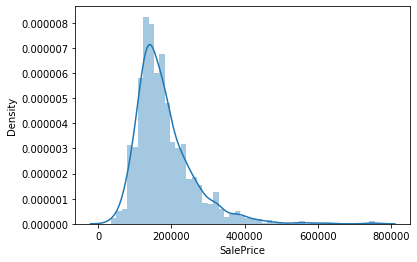

In [11]:
sns.distplot(train['SalePrice'])

**From the plot we can observe that most of the building were valued at 100000-200000 range.**

### Let's fill all nan's with 0 initially

In [12]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [13]:
train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [14]:
test.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

**We can observe that all the nan values in the train and test dataset is replace with zero. Now no nan values are present in the dataset.**

### Label encoding all the categorical columns

In [15]:
numberic_features=train.select_dtypes(include=[np.number])
categorical_features=train.select_dtypes(include=[np.object])

In [16]:
from sklearn.preprocessing import LabelEncoder

for c in categorical_features:
    le = LabelEncoder() 
    train_list  = list(train[c].values)
    test_list = list(test[c].values)
    train_list.extend(test_list)
    le.fit(train_list)
    train[c] = le.transform(list(train[c].values))
    test[c] = le.transform(list(test[c].values))

### Lets split the data into train and validation sets

In [17]:
target = "SalePrice"
features = list(train.columns)
print(len(features))
features = [i for i in features if i!=target]
print(len(features))

76
75


In [18]:
# Splitting the dataset into train and test set with 80% in train and 20% in test to validate the model
train, valid = train_test_split(train, test_size = 0.2, shuffle=True, random_state=42)

print(f'Shape of train dataset : {train.shape}') # getting train data shape
print(f'Shape of train dataset : {valid.shape}') # getting test data shape

Shape of train dataset : (1168, 76)
Shape of train dataset : (292, 76)


In [19]:
train_X = train[features]# taking the training data features
train_y=train[target]# output of our training data
valid_X= valid[features] # taking test data features
valid_y =valid[target]   #output value of test data

### Lets perform the Logistic regression

In [20]:
model = LogisticRegression(random_state=42)
model.fit(train_X,train_y)
prediction=model.predict(valid_X)

In [21]:
def rmse_(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [22]:
rmse = rmse_(valid_y, prediction) # Calculates the root mean square error for the prediction

In [23]:
print(f'Root Mean Square error for the Logistic regression model : {rmse}')

Root Mean Square error for the Logistic regression model : 64972.20719266278


### Lets perform Random Forest Regression

In [24]:
rf = RandomForestRegressor(n_estimators=300)

In [25]:
rf.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [26]:
prediction=rf.predict(valid_X)

In [27]:
rmse = rmse_(valid_y, prediction) # Calculates the root mean square error for the prediction
print(f'Root Mean Square error for the Random Forest regression model : {rmse}')

Root Mean Square error for the Random Forest regression model : 29264.827787408733


### OBSERVATIONS

- **The lower the root mean square error value the better the model.**

- **We can observe that Random Forest Regression model performs better compared to the Logistic Regression model.**

- **We can improve the model by preprocessing the data and creating som e new features based on teh existing ones.**

- **We can also replace the nan'a with mode, (or) other values to improve the model performance.**

- **We can also perform standard scalar technique to improve the model.**